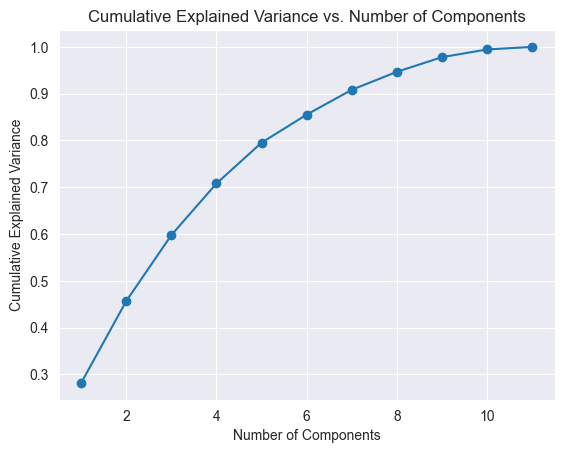

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из файла CSV
wine_data = pd.read_csv('winequality/winequality-red.csv', delimiter=';')

# Подготовка данных
X = wine_data.drop('quality', axis=1)  # Независимые переменные
y = wine_data['quality']  # Целевая переменная

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Выполнение анализа главных компонент
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Визуализация объясненной дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [4]:
# Вывод вклада каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Component {i+1}: {ratio:.4f}')

# Вывод загруженностей признаков на первую компоненту
loadings = pca.components_[0]
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})
sorted_loadings = loadings_df.sort_values(by='Loading', ascending=False)
sorted_loadings

Component 1: 0.2817
Component 2: 0.1751
Component 3: 0.1410
Component 4: 0.1103
Component 5: 0.0872
Component 6: 0.0600
Component 7: 0.0531
Component 8: 0.0385
Component 9: 0.0313
Component 10: 0.0165
Component 11: 0.0054


,Feature,Loading
0,fixed acidity,0.489314
2,citric acid,0.463632
7,density,0.395353
9,sulphates,0.242921
4,chlorides,0.212247
3,residual sugar,0.146107
6,total sulfur dioxide,0.023575
5,free sulfur dioxide,-0.036158
10,alcohol,-0.113232
1,volatile acidity,-0.238584


In [6]:
selected_features = ['volatile acidity', 'citric acid']
X = wine_data[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Component {i+1}: {ratio:.4f}')

loadings = pca.components_[0]
loadings_df = pd.DataFrame({'Feature': selected_features, 'Loading': loadings})
sorted_loadings = loadings_df.sort_values(by='Loading', ascending=False)
sorted_loadings

Component 1: 0.7762
Component 2: 0.2238


,Feature,Loading
0,volatile acidity,0.707107
1,citric acid,-0.707107
